In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind

In [584]:
def learning_curve():
    curve_portfolio = []
    curve_market = []
    for i in range(1, 2001):
        
        value = pd.read_hdf(f'regelum_data/outputs/2024-04-18/01-25-13/0/.callbacks/ValueCallback/Total_Objectives_in_iteration_{str(i).zfill(5)}.h5')
        if (i - 1)% 20 < 10:
            curve_portfolio.append(np.mean(value.objective))
        else:
            curve_market.append(np.mean(value.objective))
    return curve_portfolio, curve_market

In [585]:
port, market = learning_curve()

Text(0, 0.5, 'Cost by iteration')

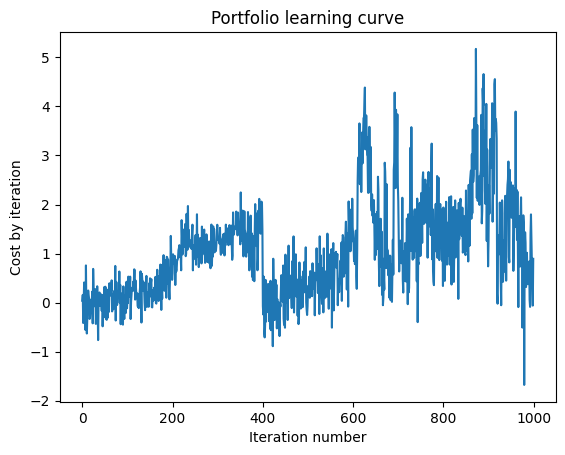

In [586]:
plt.plot(port)
plt.xlabel('Iteration number')
plt.title('Portfolio learning curve')
plt.ylabel('Cost by iteration')

Text(0, 0.5, 'Cost by iteration')

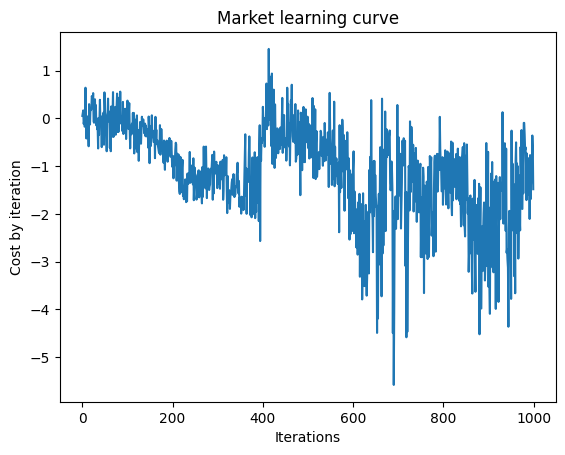

In [587]:
plt.plot(market)
plt.xlabel('Iterations')
plt.title('Market learning curve')
plt.ylabel('Cost by iteration')

In [181]:
critic = pd.read_hdf('regelum_data/outputs/2024-04-17/14-50-59/0/.callbacks/ObjectiveSaver/B. Critic objective. It 00500.h5')

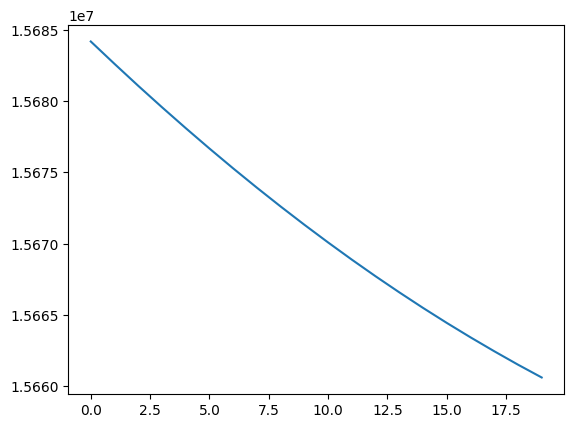

In [185]:
plt.plot(critic.objective)

In [310]:
history_0 = pd.read_hdf(f'./regelum_data/outputs/2024-04-17/22-41-11/0/.callbacks/HistoricalDataCallback/observations_actions_it_00100_ep_00008.h5')[1:]
history_1 = pd.read_hdf(f'./regelum_data/outputs/2024-04-17/22-41-11/0/.callbacks/HistoricalDataCallback/observations_actions_it_00080_ep_00008.h5')[1:]

In [534]:
history_sim = pd.read_hdf(f'./regelum_data/outputs/2024-04-18/01-25-13/0/.callbacks/HistoricalDataCallback/observations_actions_it_02000_ep_00007.h5')[1:]

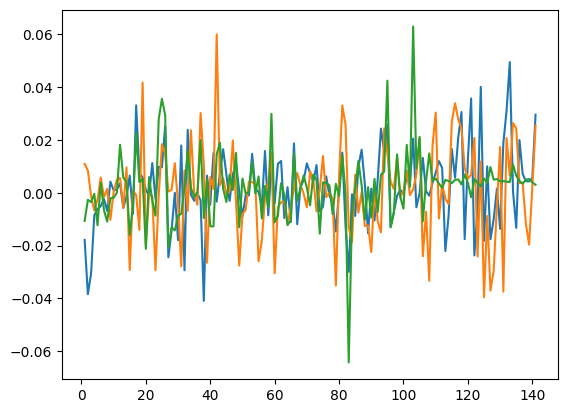

In [535]:
plt.plot(history_sim.returns_0)
plt.plot(history_sim.returns_1)
plt.plot(history_sim.returns_2)

In [539]:
np.std(history_sim.returns_2)

0.01282608632462927

In [537]:
np.std(history_0.returns_2)

0.013535087618592043

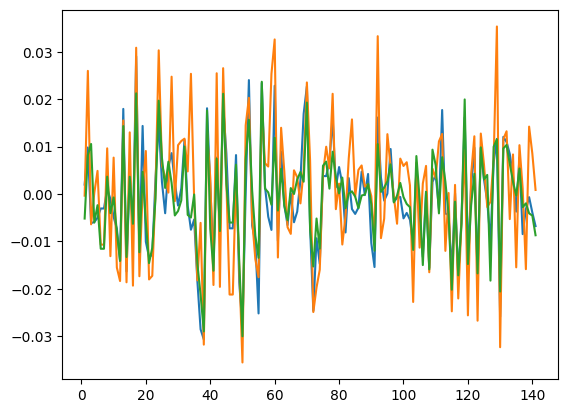

In [180]:
plt.plot(history_0.returns_0)
plt.plot(history_0.returns_1)
plt.plot(history_0.returns_2)

In [583]:
def calculate_sharpe_PnL():

    for j in range(1, 51):
        sharpe_0 = []
        sharpe_1 = []
        sharpe_based = []
        pnl_0 = []
        pnl_1 = []
        pnl_based = []
        returns_0 = []
        returns_1 = []
        for i in range(1, 16):

            history_0 = pd.read_hdf(f'./regelum_data/outputs/2024-04-18/07-21-49/0/.callbacks/HistoricalDataCallback/observations_actions_it_{str(j).zfill(5)}_ep_{str(i).zfill(5)}.h5')[1:]
            history_1 = pd.read_hdf(f'./regelum_data/outputs/2024-04-18/07-29-43/0/.callbacks/HistoricalDataCallback/observations_actions_it_{str(j).zfill(5)}_ep_{str(i).zfill(5)}.h5')[1:]
            history_0['PnL'] = (history_0['current_price_0 [USD]']*history_0['current_volume_0'] +
                history_0['current_price_1 [USD]']*history_0['current_volume_1']+
                history_0['current_price_2 [USD]']*history_0['current_volume_2']+
                history_0['cash [USD]'])
            history_1['PnL'] = (history_1['current_price_0 [USD]']*history_1['current_volume_0'] +
                history_1['current_price_1 [USD]']*history_1['current_volume_1']+
                history_1['current_price_2 [USD]']*history_1['current_volume_2']+
                history_1['cash [USD]'])
            history_0['sum_of_prices'] = (history_0['current_price_0 [USD]'] +
                history_0['current_price_1 [USD]']+
                history_0['current_price_2 [USD]']+ 100)
            history_0['port_return'] = (history_0['PnL'] - history_0['PnL'].shift(1))/history_0['PnL'].shift(1)
            history_1['port_return'] = (history_1['PnL'] - history_1['PnL'].shift(1))/history_1['PnL'].shift(1)
            returns_0.extend(history_0['port_return'].to_list())
            returns_1.extend(history_1['port_return'].to_list())
            sharpe_based.append(np.mean((history_0['sum_of_prices'] - history_0['sum_of_prices'].shift(1))/history_0['sum_of_prices'].shift(1))/np.std((history_0['sum_of_prices'] - history_0['sum_of_prices'].shift(1))/history_0['sum_of_prices'].shift(1)))
            sharpe_0.append(np.mean((history_0['PnL'] - history_0['PnL'].shift(1))/history_0['PnL'].shift(1))/np.std((history_0['PnL'] - history_0['PnL'].shift(1))/history_0['PnL'].shift(1)))
            sharpe_1.append(np.mean((history_1['PnL'] - history_1['PnL'].shift(1))/history_1['PnL'].shift(1))/np.std((history_1['PnL'] - history_1['PnL'].shift(1))/history_1['PnL'].shift(1)))
            pnl_0.append(history_0['PnL'].iloc[-1])
            pnl_1.append(history_1['PnL'].iloc[-1])
            pnl_based.append(history_0['sum_of_prices'].iloc[-1])
        print(j,np.mean(sharpe_based), np.mean(sharpe_0), np.mean(sharpe_1), np.mean(pnl_based), np.mean(pnl_0), np.mean(pnl_1))
        print(ttest_ind(returns_0, returns_1, alternative = 'less', nan_policy = 'omit'))
        print(ttest_ind(sharpe_0, sharpe_1, alternative = 'less', nan_policy = 'omit'))
    return returns_0, returns_1, sharpe_0, sharpe_1

returns_0, returns_1, sharpe_0, sharpe_1 = calculate_sharpe_PnL()

1 0.028242244128496068 0.02746908573955339 0.030879068273934156 370.6666666666667 370.4600625745241 370.60274752594455
TtestResult(statistic=-0.12425063611389207, pvalue=0.45056138986792765, df=4198.0)
TtestResult(statistic=-0.17156996562489682, pvalue=0.43250479293137145, df=28.0)
2 0.0262988565221697 0.025865747651945156 0.046091272107634286 357.47533333333325 357.3728524183397 368.6274189862795
TtestResult(statistic=-1.1728998244143012, pvalue=0.1204512638497534, df=4198.0)
TtestResult(statistic=-0.8241016466718418, pvalue=0.20842339167276608, df=28.0)
3 0.021699048409564037 0.021292520207556207 0.02498490956382631 360.3946666666667 360.30494461846683 362.87163443672705
TtestResult(statistic=-0.34443760888105013, pvalue=0.36526723112780496, df=4198.0)
TtestResult(statistic=-0.14578487924414185, pvalue=0.4425678417331587, df=28.0)
4 0.049283528690363974 0.04788830993001035 0.0579732660224971 358.84733333333327 358.4009423053723 366.0128800974192
TtestResult(statistic=-0.8914243494394